In [1]:
from IPython.display import YouTubeVideo

# W4 Lab Assignment

The aims of today's lab is 

1. to do a mini-experiment of the Stevens' power-law (of course you can conduct your own psychophysics experiments!)
2. to play with matplotlib's colormaps, including the awesome `vidiris`. 

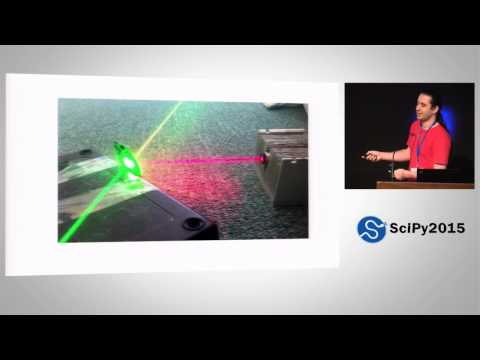

In [2]:
YouTubeVideo("xAoljeRJ3lU")

First, import `numpy` and `matplotlib` libraries (don't forget the `matplotlib inline` magic command). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Stevens’ power-law and your own psychophysics experiment!

Let's do the experiment. The procedure is as follows:

1. Generate a random number between \[0.01,0.1\].
1. Create a horizontal bar whose length equals to the random number.
1. Compare the "random bar" to two other bars with fixed length 0.01 and 0.1. Guess the length of the random bar.
1. Store your guess (perceived length) and actual length to two lists respectively.
1. Re-generate the random bar so that it has a different length. Repeat the above steps many times.
1. Plot the list of perceived length and the list of actual length. In this way we can check whether Steven's power-law holds.

First, we use two lists to store perceived and actual length.

In [24]:
import random
import time

length_perceived = []
length_actual = []

## Perception of length

Let's run the experiment.

The [**`random`**](https://docs.python.org/3/library/random.html) module in Python provides various random number generators. In particular, the [**`random.uniform(a,b)`**](https://docs.python.org/3/library/random.html#random.uniform) function returns a float in \[a,b\]. 

We can plot horizontal bars using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function. The lengths of them are 0.01, (the random number), 0.1. Using this function, produce a bar graph that looks like this, so that the random bar is in the middle:

![](stevenspowerlaw_barh.png)

<Container object of 3 artists>

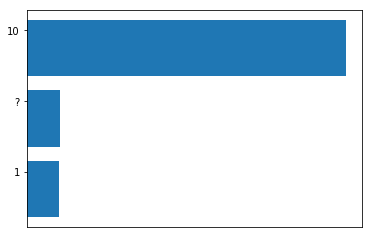

In [44]:
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

# TODO: generate a random number in [0.01, 0.1) using random.uniform(a,b) function
# Your code
actual_length = random.uniform(0.01,0.1)

# Your code 
# plt.barh(np.arange(3),  ... )
# pyplot.barh(bottom, width, height=0.8, left=None, hold=None, **kwargs)
# Make a horizontal bar plot with rectangles bounded by:
# left, left + width, bottom, bottom + height
# (left, right, bottom and top edges)
# bottom, width, height, and left can be either scalars or sequences
plt.barh(np.arange(3), [0.01, actual_length, 0.1])

From the plot above, guess the ratio between the length of the middle and the bottom bar. We can think of this more directly: If the length of the bottom bar is 1 and the top one is 10, what is the length of the middle one?

Put your guess (perceived length) in the list `length_perceived`. And the actual length in the list `length_actual`.

In [45]:
# Your code
length_actual.append(actual_length)
length_perceived.append(1)
print(length_actual)
print(length_perceived)

[0.05205752211021392, 0.022301369724556843, 0.07986211189568562, 0.07715884446555743, 0.08190113394659819, 0.021384121763832167, 0.019088113309188727, 0.0283829266931691, 0.026967069984127408, 0.01035997099806016]
[5, 2.5, 8, 7, 8, 2.25, 2.2, 3, 3, 1]


## Obtaining and plotting the data

Run the above two cells many times, namely: (1) generate a random bar graph, (2) put your guess into `length_perceived` while entering the actuall ratio into `length_actual`

Now we can draw the scatter plot by plotting `length_perceived` and `length_actual` in the same figure. The [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function will do this. Here is an example of how to use `scatter`:

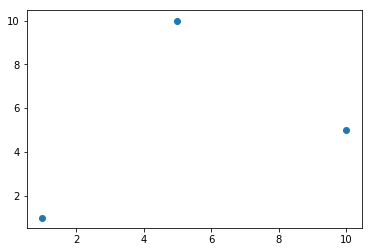

In [46]:
plt.scatter([1,5,10], [1,10, 5])

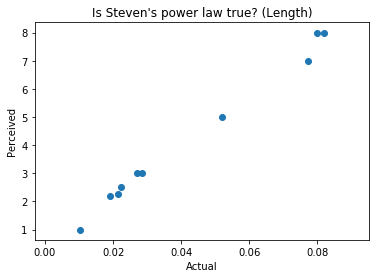

In [55]:
# Your code
# plt.scatter(...)

# Don't forget to label the axes!
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(length_actual,length_perceived)


After plotting, let's fit the relation between actual and perceived lengths using a polynomial function. We can easily do it using [**`curve_fit(f, x, y)`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in Scipy, which is to fit $x$ and $y$ using the function `f`. In our case, $f = a*x^b +c$. For instance, we can check whether this works by creating a fake dataset that follows the exact form:

In [57]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x = np.arange(20)  # [0,1,2,3, ..., 19]
y = np.power(x, 2) # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + 0.00


Now you can fit your data. 

In [58]:
# Your code
# ... = curve_fit(... )
popt, pcov = curve_fit(func, length_actual, length_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

73.53 x^0.89 + -0.11


## Perception of area

Similar to the above experiment, we now represent a random number as a circle, and the area of the circle is equal to the number.

First, calculate the radius of a circle from its area and then plot using the **`Circle()`** function. `plt.Circle((0,0), r)` will plot a circle centered at (0,0) with radius `r`.

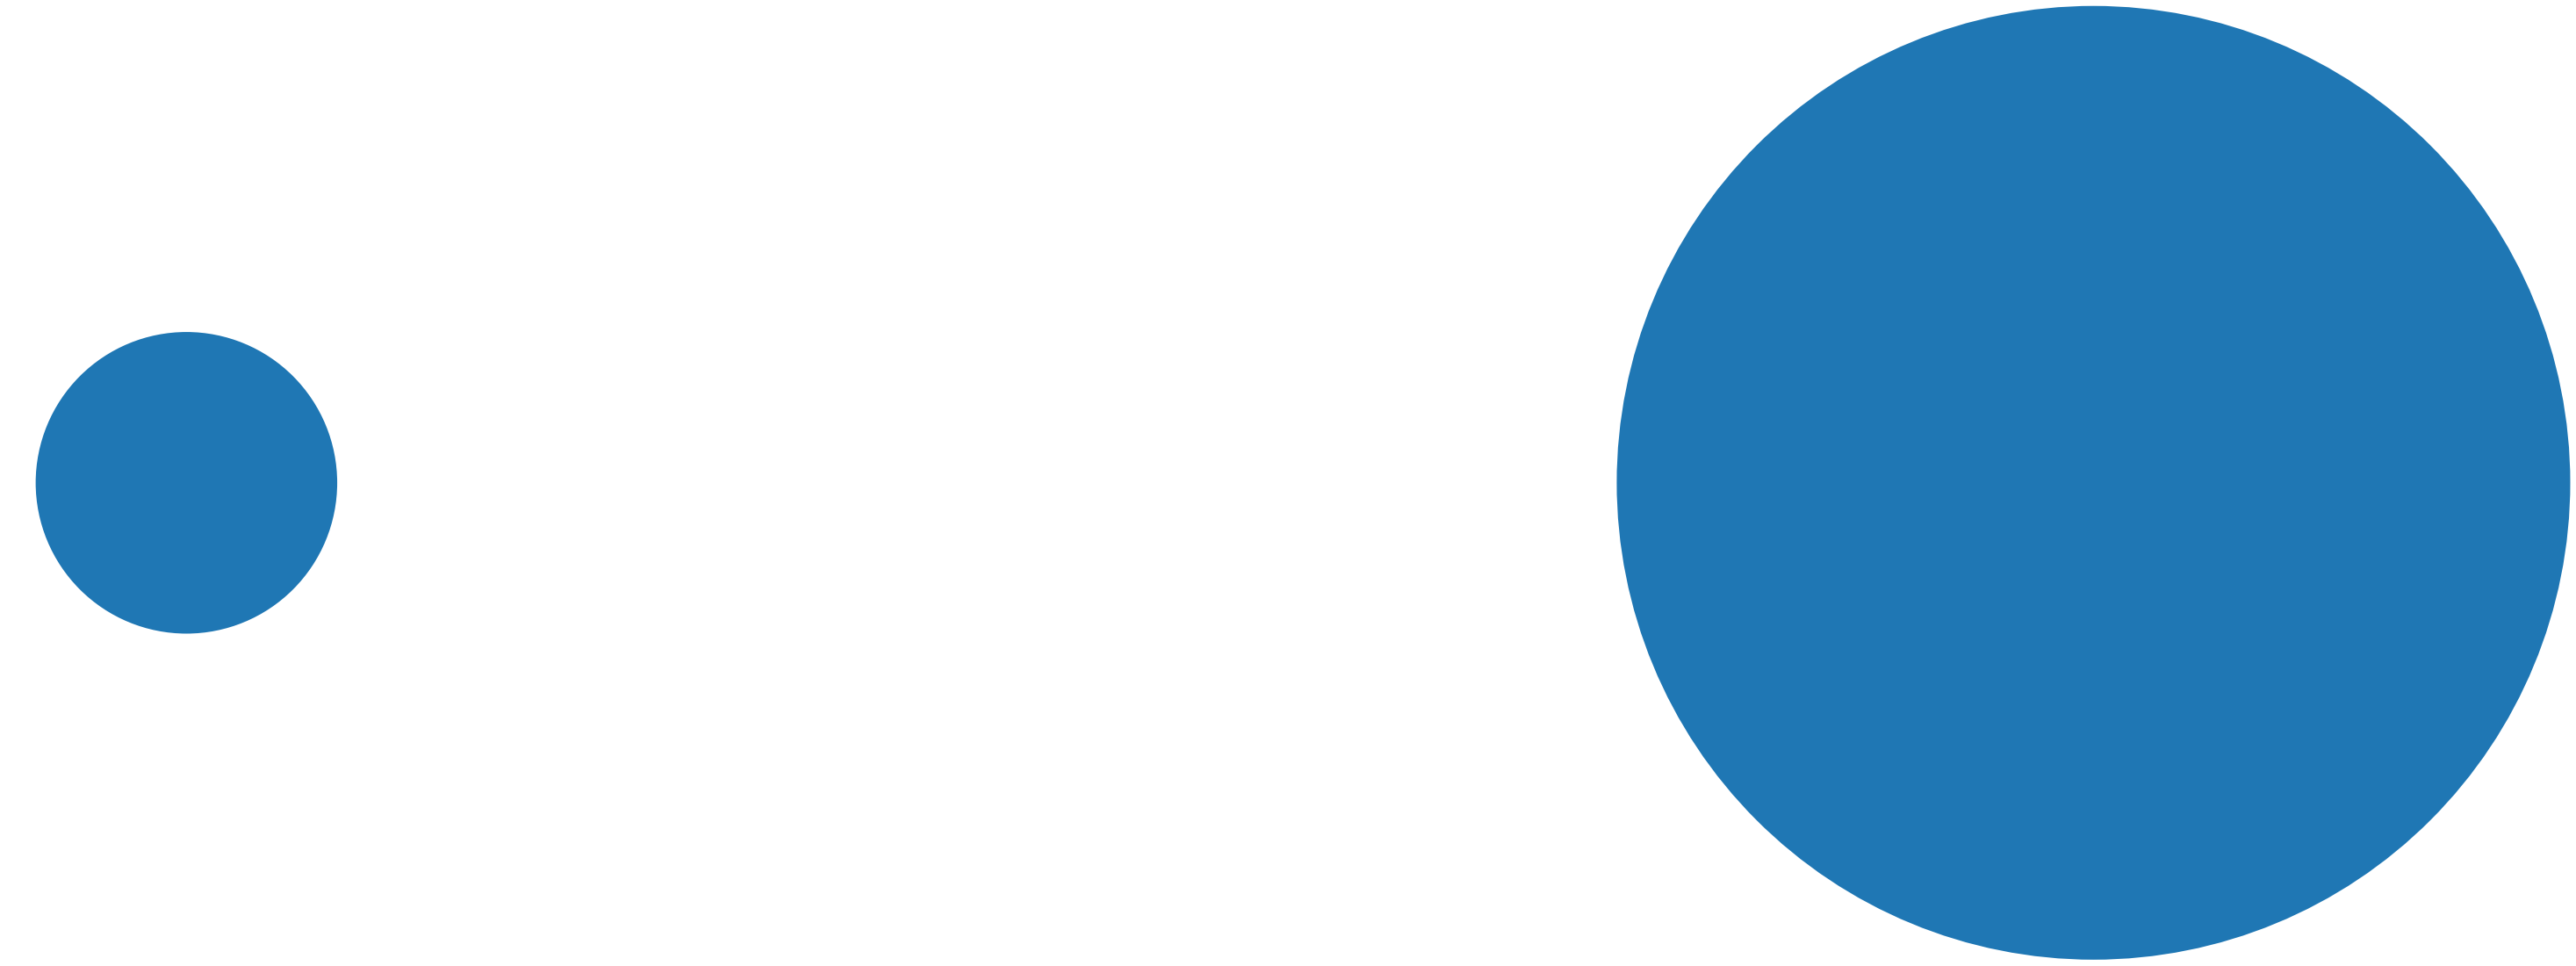

In [3]:
import math

radius1 = math.sqrt(0.01/math.pi) # area = pi * r * r
radius2 = math.sqrt(0.1/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)

Write the code to run the experiment in a similar way: add a circle with random radius, store perceived/actual values, etc. plot and fit your results in the cell below. (Feel free to create multiple cells below)

In [72]:
# initializing lists to track areas
area_perceived = []
area_actual = []

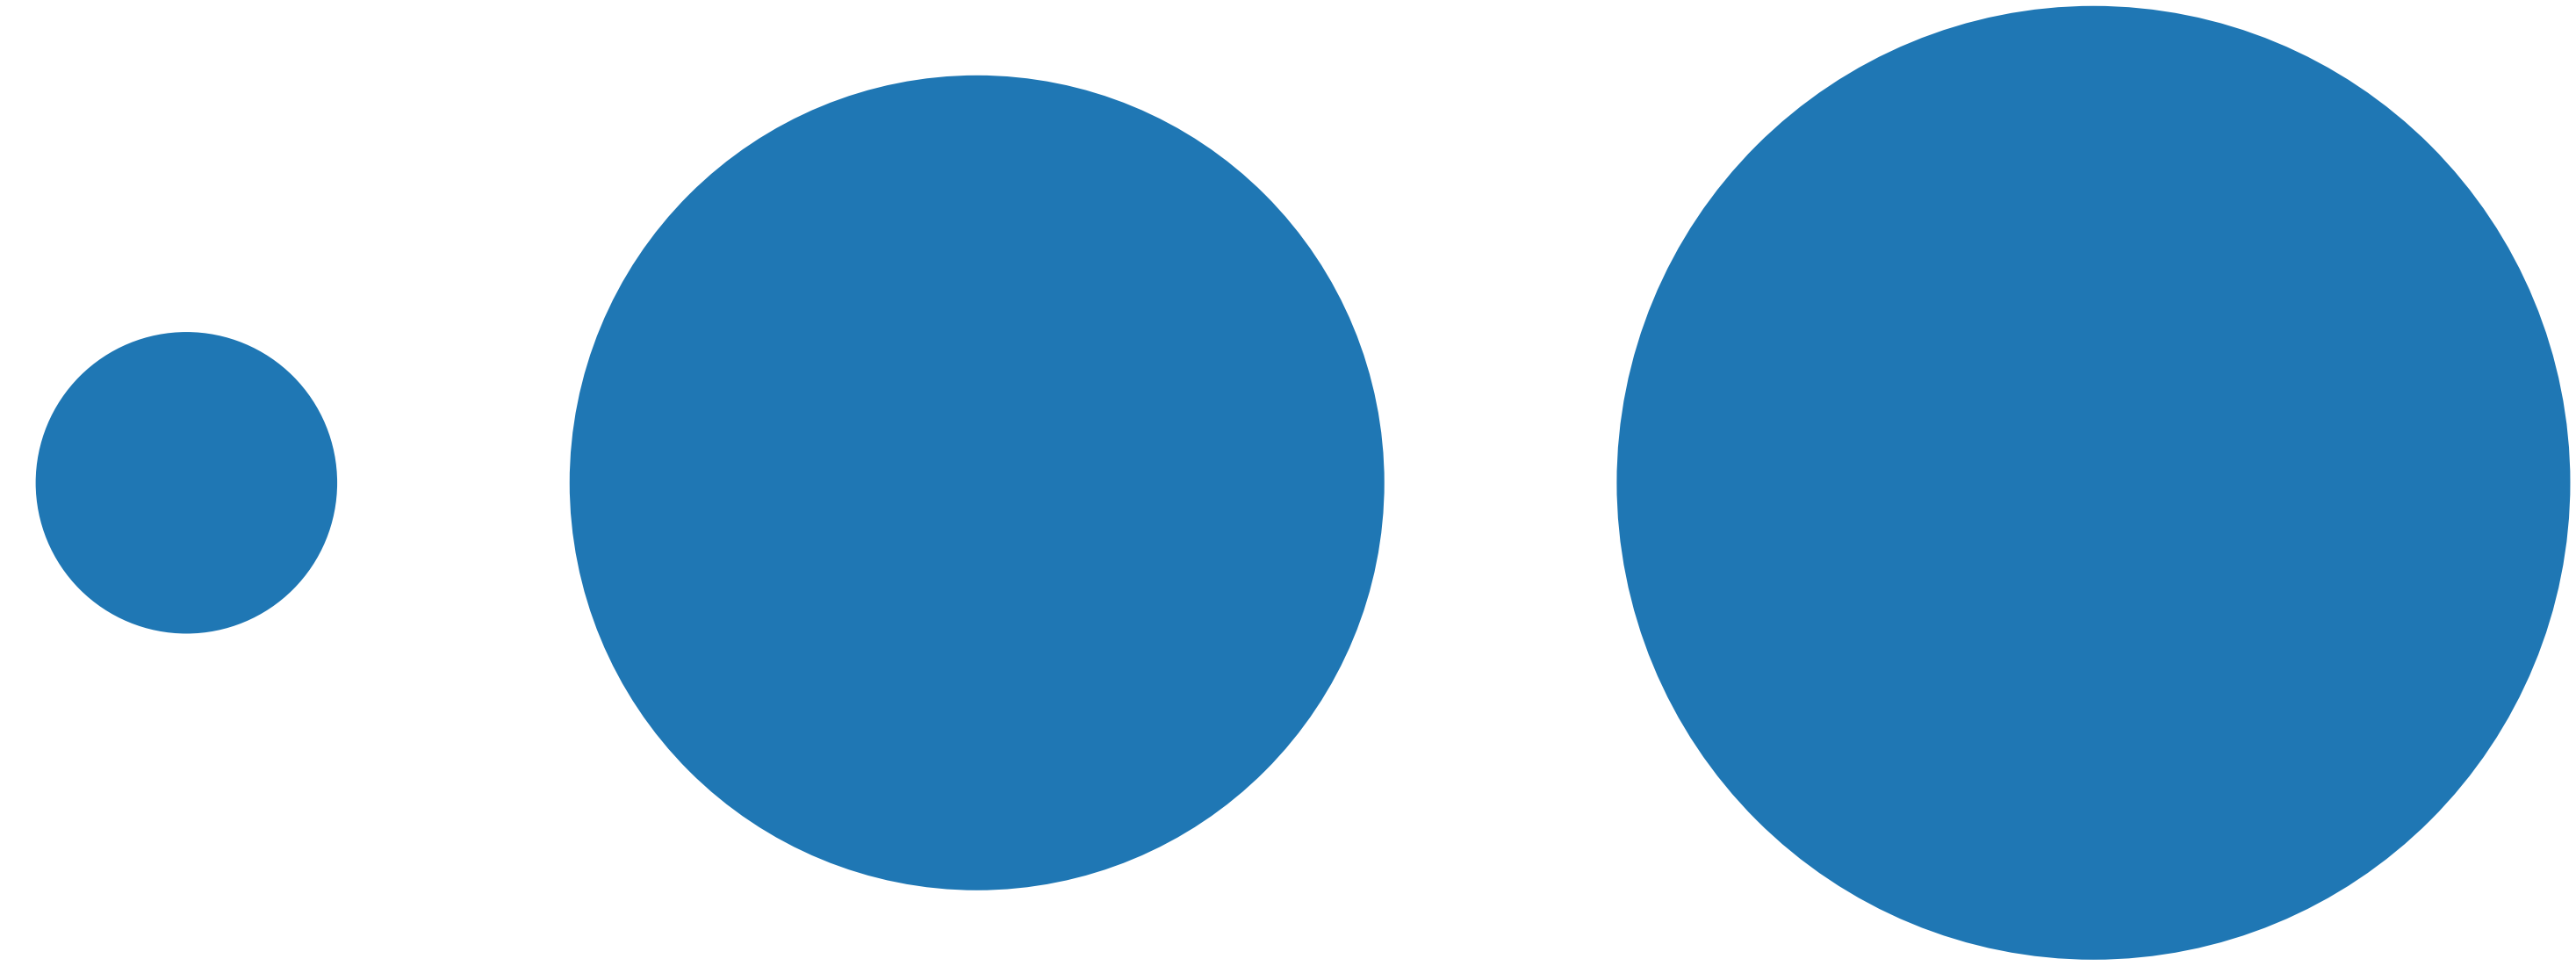

In [91]:
# Your code
radius1 = math.sqrt(0.01/math.pi) # area = pi * r * r
area_r = random.uniform(0.01,0.1)
radiusr = math.sqrt(area_r/math.pi)
radius2 = math.sqrt(0.1/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circr = plt.Circle( ((3*radius2-radius1)/2+radius1,0), radiusr, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circr)
plt.gca().add_artist(circ2)

Saving values...

In [92]:
area_actual.append(area_r)
area_perceived.append(8)
print(area_actual)
print(area_perceived)

[0.03926129735804443, 0.08381664267827754, 0.05720065620616447, 0.05386436280364602, 0.011288382128356143, 0.0796786470669488, 0.021083565255388213, 0.03779006647167144, 0.025603787594778535, 0.07300823823048344]
[3, 9.5, 7, 5, 1, 9, 1.5, 4, 2, 8]


Show the scatter plot and the curve fit. Does it follow Stevens' power-law?

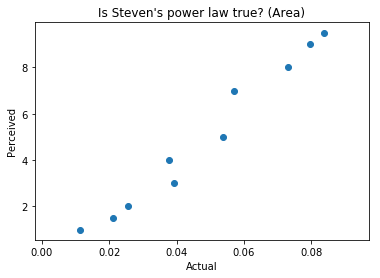

In [93]:
# Plotting now...
plt.title("Is Steven's power law true? (Area)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(area_actual,area_perceived)

Fitting the data...

In [94]:
# Your code
# ... = curve_fit(... )
popt, pcov = curve_fit(func, area_actual, area_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

218.46 x^1.26 + -0.01


### Conclusions

**Per Steven's Power Law we should have b close to 1 for length and close to 0.7 for area.
Our experiment got a value reasonably close to 1 for length but we were expecting a lower value for b for area.
So in our experiment above, with 10 data points, we were not able to replicate the results of Steven's Power Law.**



# Colormaps

To start, let's plot a sine and cosine wave respectively with red and green color.

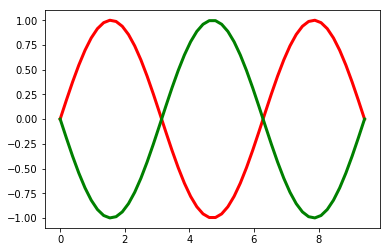

In [99]:
x = np.linspace(0, 3*np.pi)
plt.plot(x, np.sin(x), color='r', lw=3)
plt.plot(x, np.sin(x-np.pi), color='g', lw=3)

We can also use different color schemes in matplotlib. Here you can find them

http://matplotlib.org/users/colormaps.html

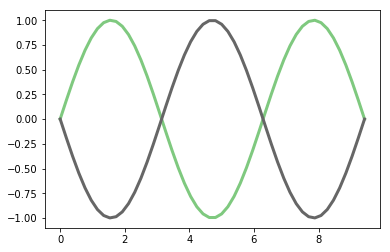

In [103]:
plt.plot(x, np.sin(x), color=plt.cm.Accent(0), lw=3)
plt.plot(x, np.sin(x-np.pi), color=plt.cm.Accent(1.0), lw=3)

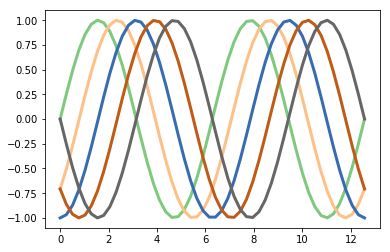

In [104]:
num_lines = 5
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Accent(color_idx[i]), lw=3)

Pick two color schemes from ![qualitative colormaps](http://matplotlib.org/_images/colormaps_reference_04.png) and reproduce the above plot.

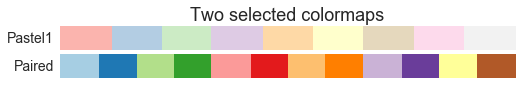

In [142]:
# Your code
# Code adapted from code example available in matpotlib man pages: 
#      https://matplotlib.org/examples/color/colormaps_reference.html
# Name of color example code: colormaps_reference.py 
# My code is adapted from this code available in the above listed url from matplotlib man pages

cmaps = [('Two selected', ['Pastel1', 'Paired'])]

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.14, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=18)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=14)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

# Seaborn color palettes

These are essentially based on matplotlib, but Seaborn makes pre-defined, good-looking palettes that you can use.

See: http://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
    http://seaborn.pydata.org/tutorial/color_palettes.html


In [143]:
import seaborn as sns

From http://seaborn.pydata.org/examples/timeseries_of_barplots.html

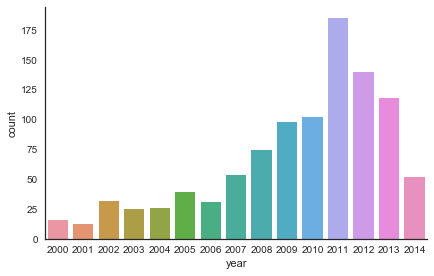

In [144]:
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")
years = np.arange(2000, 2015)

#Make a barplot with default color
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years)

To specify a palette:

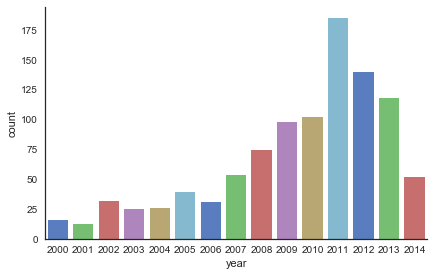

In [145]:
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette="muted")

We can also create a palette, and pass it as an argument:

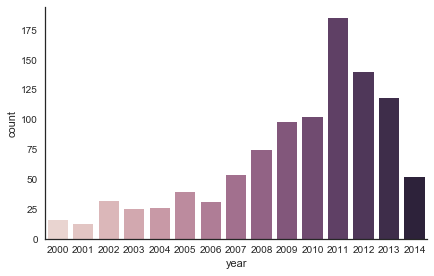

In [146]:
p = sns.cubehelix_palette(15)
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette=p)

# Colormap and images

http://matplotlib.org/users/image_tutorial.html

We can also display an image using Colormaps. First read it using the [`imread()`](http://matplotlib.org/api/image_api.html#matplotlib.image.imread) function that returns an `numpy.array()`.

In [147]:
import matplotlib.image as mpimg

In [148]:
img = mpimg.imread('sneakySnake.png')

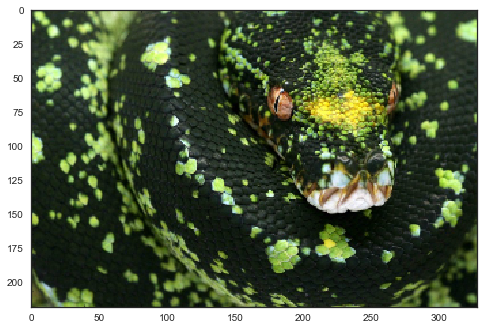

In [149]:
plt.imshow(img)

How does `img` store the image? Run the following cells

In [150]:
img

array([[[ 0.15294118,  0.21568628,  0.14117648,  1.        ],
        [ 0.16470589,  0.22745098,  0.15686275,  1.        ],
        [ 0.17254902,  0.24705882,  0.14509805,  1.        ],
        ..., 
        [ 0.1882353 ,  0.22352941,  0.17647059,  1.        ],
        [ 0.1882353 ,  0.23921569,  0.18039216,  1.        ],
        [ 0.21960784,  0.29803923,  0.21176471,  1.        ]],

       [[ 0.1882353 ,  0.25490198,  0.17647059,  1.        ],
        [ 0.18431373,  0.26274511,  0.16470589,  1.        ],
        [ 0.3019608 ,  0.40392157,  0.25098041,  1.        ],
        ..., 
        [ 0.18431373,  0.21176471,  0.18039216,  1.        ],
        [ 0.18039216,  0.21960784,  0.18431373,  1.        ],
        [ 0.17254902,  0.22745098,  0.17647059,  1.        ]],

       [[ 0.18431373,  0.25098041,  0.18039216,  1.        ],
        [ 0.24705882,  0.34117648,  0.2       ,  1.        ],
        [ 0.41960785,  0.5529412 ,  0.31764707,  1.        ],
        ..., 
        [ 0.2       ,  0

In [151]:
np.shape(img)

(219, 329, 4)

This means that `img` is a three-dimensional array with 219 x 329 x 4 numbers. If you look at the image, you can easily see that 219 and 329 are the dimensions (height and width in terms of the number of pixels) of the image. What is 4? 

We can actually create our own small image to investigate. Let's create a 3x3 image. 

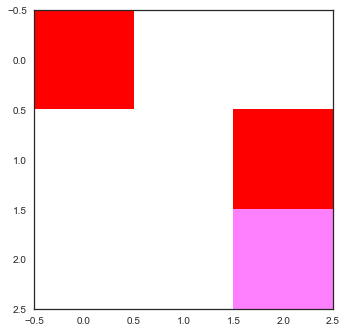

In [152]:
myimg = np.array([ [[1,0,0,1], [1,1,1,1], [1,1,1,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,0,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,1,0.5]] ])
plt.imshow(myimg)

Why are they blurred? It should have only 3 pixels across, right? It's because of `interpolation`. By setting it to `nearest` you can get the raw pixel values more clearly. 

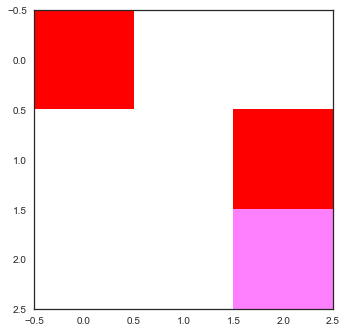

In [153]:
plt.imshow(myimg, interpolation="nearest")

Play with the values of the matrix, and explain what are each of the four dimensions (this matrix is 3x3x**4**) below. 

YOUR ANSWER HERE


I did not notice any blurring in my Mac...  <br>
At any rate, this is what I understand: <br>
The first axis is the row in the image pixel grid <br>
The second axis is the column in the image pixel grid <br>
The third axis has 4 values <br>
The first three correspond to the R,G,B saturation of the colors Red, Green, and Blue <br>
The forth value in the 3rd axis is the brightness of the color <br>
See examples below 

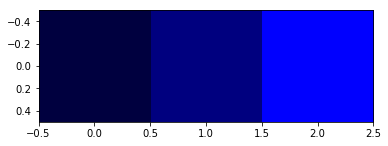

In [5]:
# here we show 3 levels of saturation for blue
# to enphasize the effect of saturation we "close" the channels for red and green
# we go from very little saturation to full saturation
bluesat = np.array([ [ [0,0,0.25], [0,0,0.5], [0,0,1] ] ], dtype=float)
plt.imshow(bluesat)

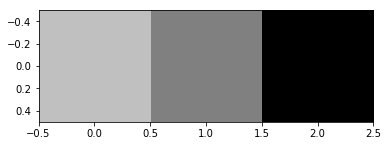

In [6]:
# here we show 3 levels of brightness for black
# to enphasize the effect of brightness we test with black
# we go from very little saturation to full saturation
brightness = np.array([ [ [0,0,0,0.25], [0,0,0,0.5], [0,0,0,1] ] ], dtype=float)
plt.imshow(brightness)

## Applying other colormaps

Let's assume that the first value of the four dimensions represents some data of your interest. You can obtain `height x width x 1` matrix by doing `img[:,:,0]`, which means give me the all of the first dimension (`:`), all of the second dimension (`:`), but only the first one from the last dimension (`0`). 

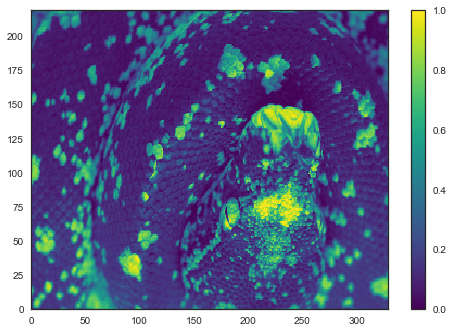

In [162]:
plt.pcolormesh(img[:,:,0], cmap=plt.cm.viridis)
plt.colorbar()

Why is it flipped upside down? Take a look at the previous `imshow` example closely and compare the axes across these two displays. Below, flip the figure upside down to show it properly. This function [`numpy.flipud()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.flipud.html) should be handy. 

### Answer

**From what I can tell, imshow renders the image array from low to high value of the first axis, i.e., image row, while pcolormesh renders the image from bottom row to top row, as we can see from the axis value on the vertical edge of the image. <BR>
That is what I can gatter from the experiment below. <BR>
I do realize that the new reshaped array generate a greyscale image, however, from what I can tell that has no bearing on why the imagine is upside down.  As we can see below, the same array will create a right-side-up image wih imshow.**

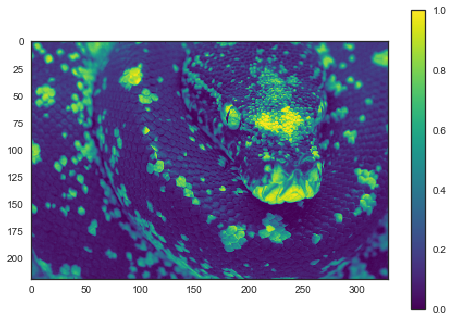

In [170]:
plt.imshow(img[:,:,0], cmap=plt.cm.viridis)
plt.colorbar()

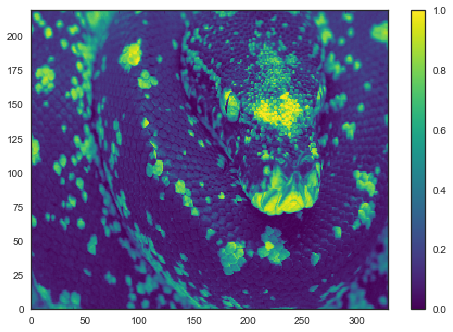

In [167]:
# your code
plt.pcolormesh(np.flipud(img[:,:,0]), cmap=plt.cm.viridis)
plt.colorbar()